# Proyek Predictive Analytics: Diabetes Risk Prediction
## Dataset-Source: https://www.kaggle.com/datasets/whenamancodes/predict-diabities

### **by Paulina Hambali - MC009D5X2419**


## Import Library

In [1]:
# Data handling-analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models dan evaluasi
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#kagglehub
import kagglehub

## Data Loading


In [2]:
# Download Dataset
path = kagglehub.dataset_download("whenamancodes/predict-diabities")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/predict-diabities


In [3]:
# Read Dataset
file_path = path + "/diabetes.csv"
df = pd.read_csv(file_path)

## Exploratory Data Analysis (EDA)

In [4]:
# Rows in dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Total rows and column in dataset & desc column
print("Jumlah rows dan column: ",(df.shape))
print(df.columns)


Jumlah rows dan column:  (768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [6]:
# Type data check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Check missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
# Descriptive Statistic
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Check target class
print(df['Outcome'].value_counts())
print(df['Outcome'].unique())

Outcome
0    500
1    268
Name: count, dtype: int64
[1 0]


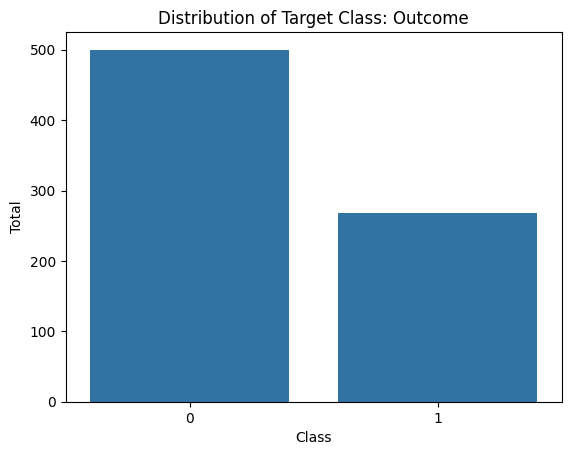

In [10]:
# Visualization: distribution of target class
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Target Class: Outcome')
plt.xlabel('Class')
plt.ylabel('Total')
plt.show()

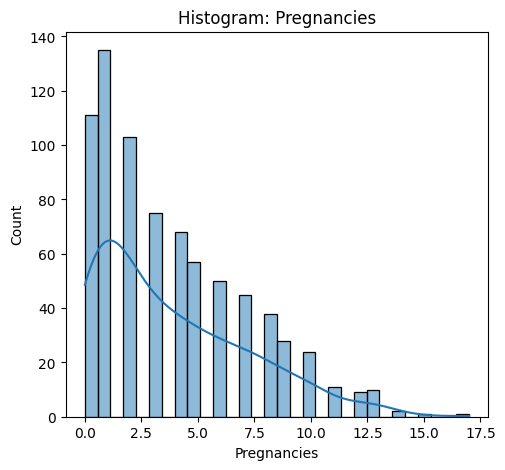

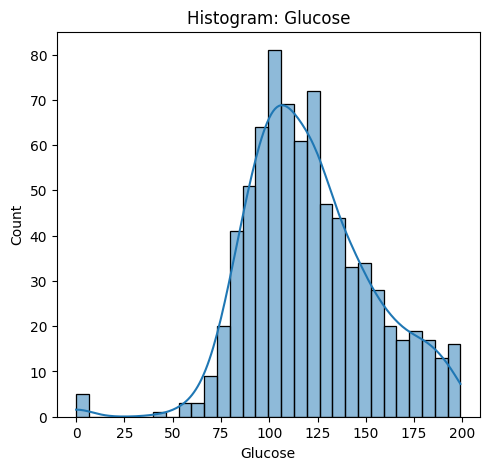

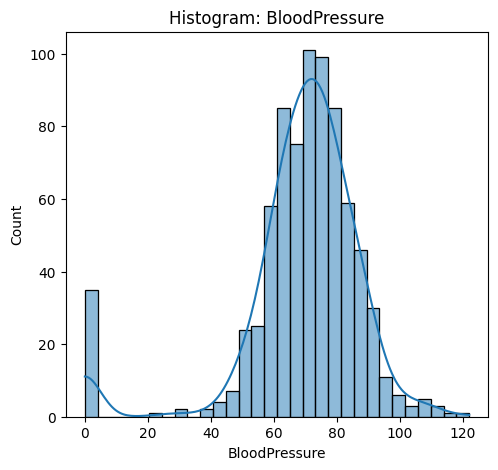

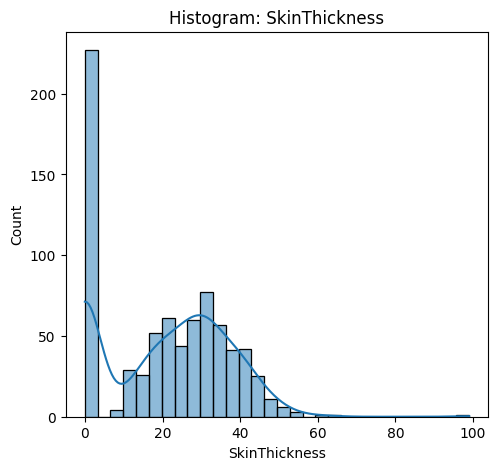

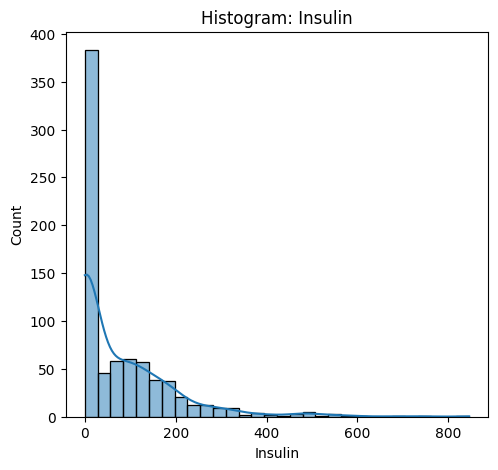

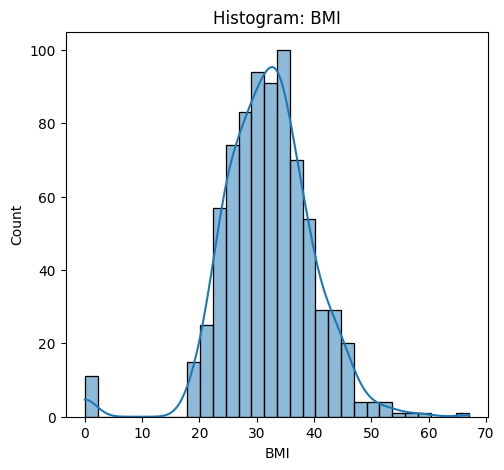

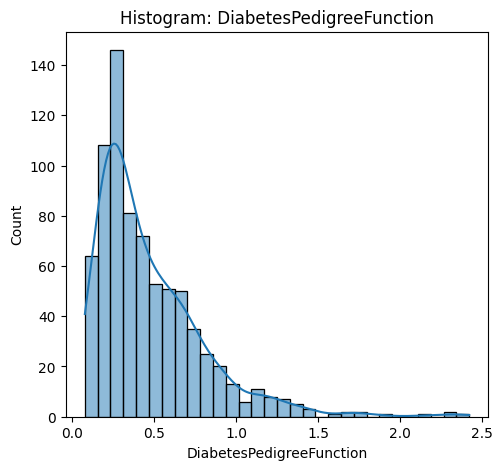

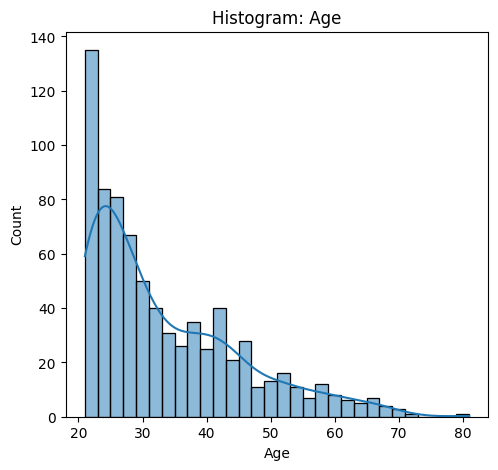

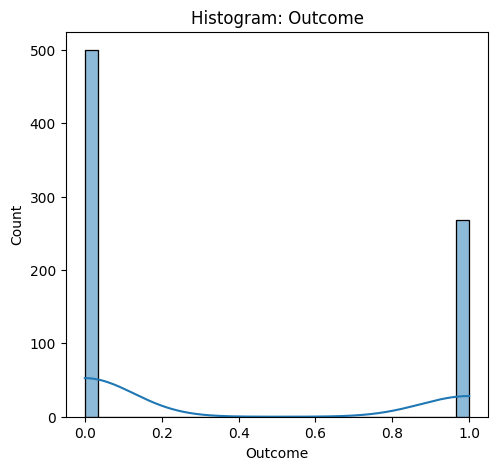

In [11]:
# Visualization: distribution of numeric feature
numerical_col= df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for feature in numerical_col:
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Histogram: {feature}')

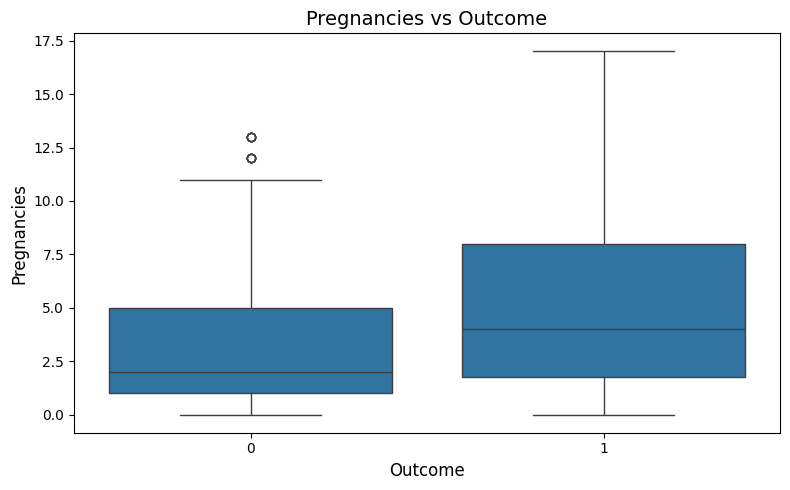

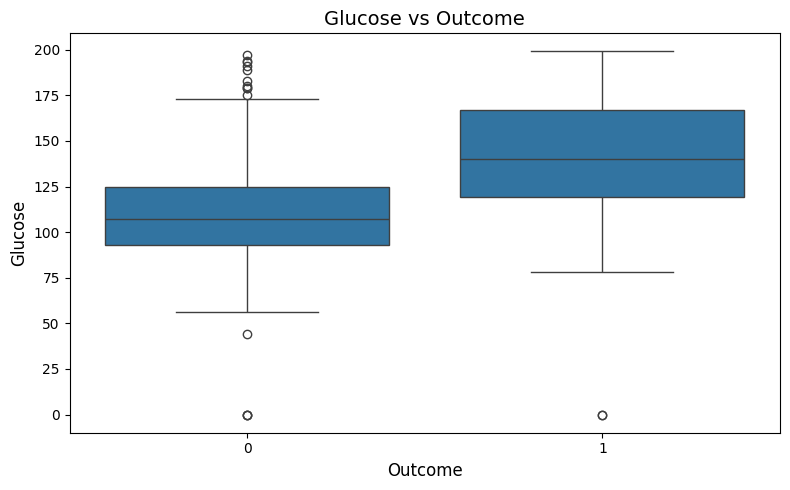

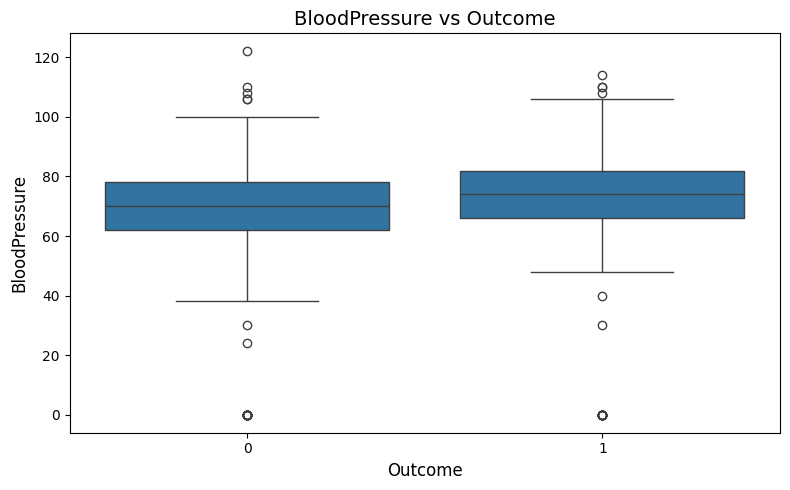

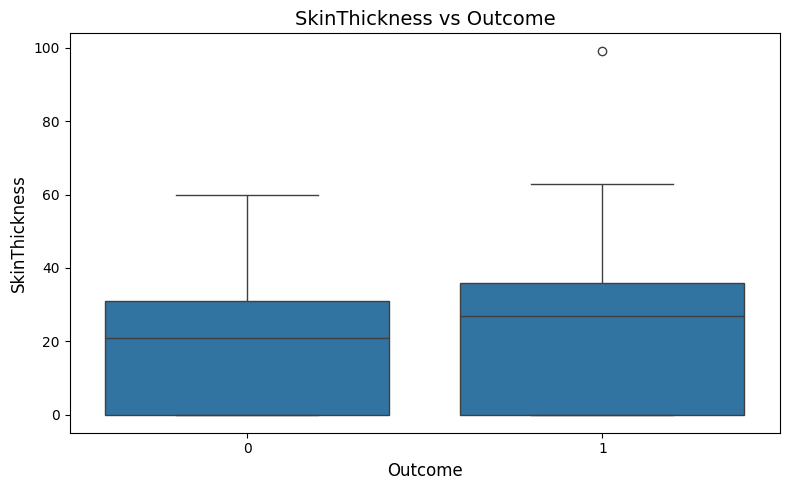

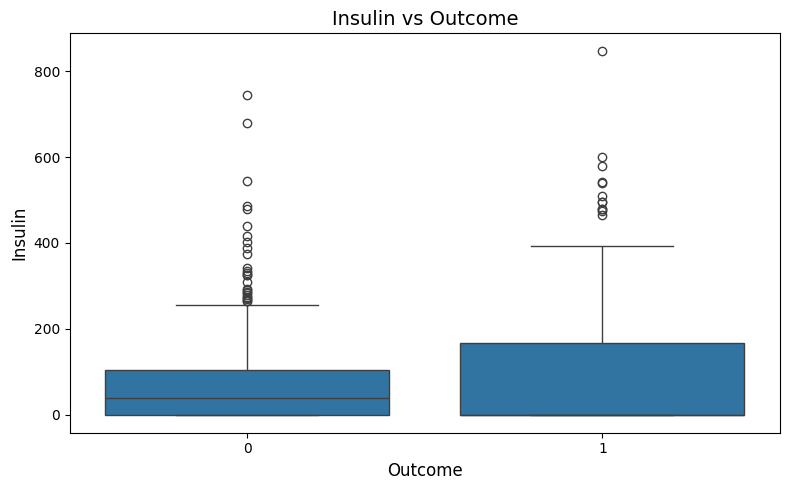

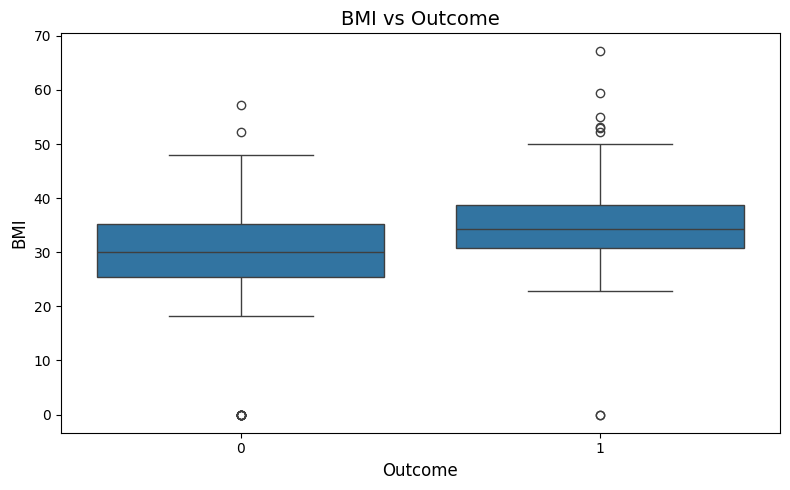

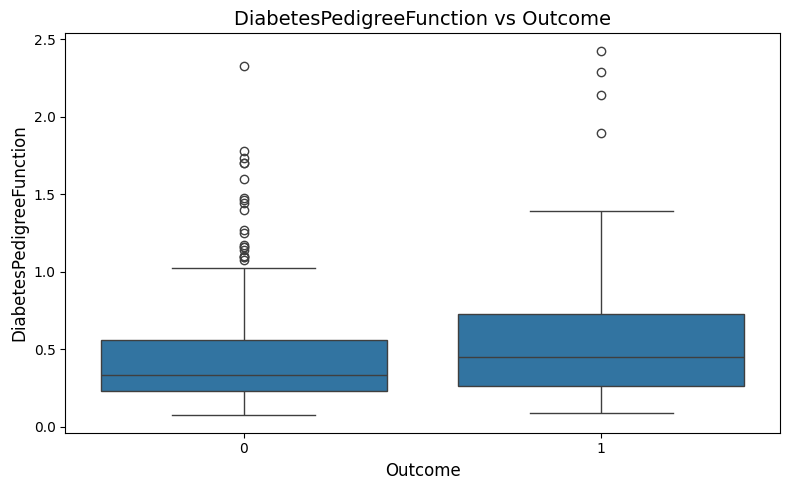

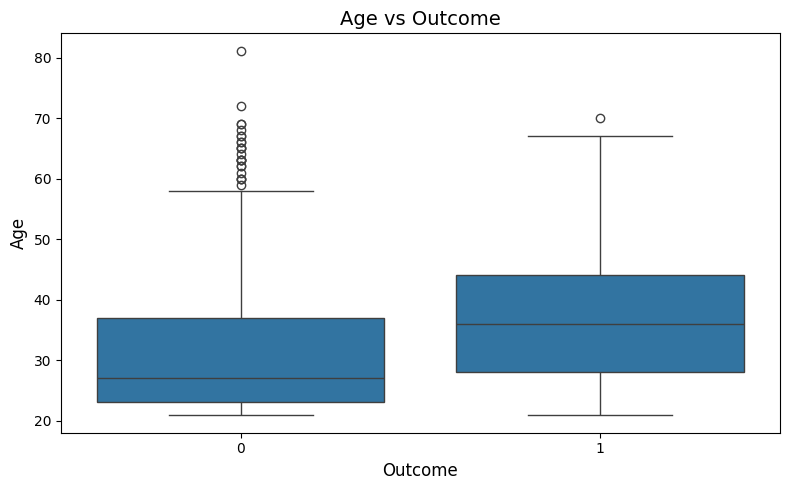

In [12]:
# Visualization: correlation between feature and target & Outlier (only numeric feature)
target = 'Outcome'
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if target in numerical_col:
    numerical_col.remove(target)

for feature in numerical_col:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=target, y=feature, data=df)
    plt.title(f'{feature} vs {target}', fontsize=14)
    plt.xlabel(target, fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

## Data Preparation

In [13]:
# Feature and Target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [14]:
# Data split (Train-Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
# Feature Scaling (Normalization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [16]:
# Dataframe
models = pd.DataFrame(index=['train_acc', 'test_acc'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [17]:
# KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
models.loc['train_acc', 'KNN'] = accuracy_score(y_train, knn.predict(X_train))
models.loc['test_acc', 'KNN'] = accuracy_score(y_test, knn.predict(X_test))

In [18]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
models.loc['train_acc', 'RandomForest'] = accuracy_score(y_train, rf.predict(X_train))
models.loc['test_acc', 'RandomForest'] = accuracy_score(y_test, rf.predict(X_test))

In [19]:
# Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
models.loc['train_acc', 'Boosting'] = accuracy_score(y_train, gb.predict(X_train))
models.loc['test_acc', 'Boosting'] = accuracy_score(y_test, gb.predict(X_test))

## Evaluation

In [20]:
# Hasil Models
models

,KNN,RandomForest,Boosting
train_acc,0.776873,1.0,0.918567
test_acc,0.779221,0.831169,0.811688


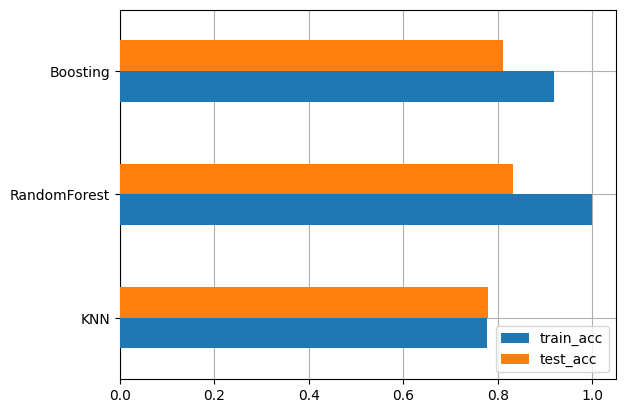

In [21]:
# Bar Chart Models
fig, ax = plt.subplots()
models.sort_index(level='test_acc', ascending=False).T.plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [22]:
# Classification Report
model_dict = {
    'KNN': knn,
    'RandomForest': rf,
    'Boosting': gb
}

print("Classification Report")
for name, model in model_dict.items():
    print(f"\nModel: {name}")
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(report)

Classification Report

Model: KNN
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       107
           1       0.70      0.49      0.57        47

    accuracy                           0.78       154
   macro avg       0.75      0.70      0.71       154
weighted avg       0.77      0.78      0.77       154


Model: RandomForest
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       107
           1       0.72      0.72      0.72        47

    accuracy                           0.83       154
   macro avg       0.80      0.80      0.80       154
weighted avg       0.83      0.83      0.83       154


Model: Boosting
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       107
           1       0.69      0.70      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
we

In [23]:
# Final Evaluation Report
report_dict = {}
for name, model in model_dict.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    report_dict[name] = {
        'Precision (0)': report['0']['precision'],
        'Recall (0)': report['0']['recall'],
        'F1-score (0)': report['0']['f1-score'],
        'Precision (1)': report['1']['precision'],
        'Recall (1)': report['1']['recall'],
        'F1-score (1)': report['1']['f1-score'],
        'Accuracy': report['accuracy']
    }
report_df = pd.DataFrame(report_dict).T
print(report_df.round(3))

              Precision (0)  Recall (0)  F1-score (0)  Precision (1)  \
KNN                   0.802       0.907         0.851          0.697   
RandomForest          0.879       0.879         0.879          0.723   
Boosting              0.868       0.860         0.864          0.688   

              Recall (1)  F1-score (1)  Accuracy  
KNN                0.489         0.575     0.779  
RandomForest       0.723         0.723     0.831  
Boosting           0.702         0.695     0.812  
